In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas_profiling
np.random.seed(123)

In [491]:
# Import the raw data set
df_raw = pd.read_csv('diabetic_data.csv')

In [492]:
df_raw.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [493]:
df_raw = df_raw.replace("?",np.NaN)

In [494]:
df_raw.shape

(101766, 50)

In [495]:
df_raw.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [496]:
df_raw.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [497]:
# Get an understanding of missingness, unique values, and head/tail sample
for col in df_raw:
    print(df_raw[col])
    print("**************************************************************************************")
    print(df_raw[col].unique())
    print("**************************************************************************************")
    print("**************************************************************************************")

0           2278392
1            149190
2             64410
3            500364
4             16680
            ...    
101761    443847548
101762    443847782
101763    443854148
101764    443857166
101765    443867222
Name: encounter_id, Length: 101766, dtype: int64
**************************************************************************************
[  2278392    149190     64410 ... 443854148 443857166 443867222]
**************************************************************************************
**************************************************************************************
0           8222157
1          55629189
2          86047875
3          82442376
4          42519267
            ...    
101761    100162476
101762     74694222
101763     41088789
101764     31693671
101765    175429310
Name: patient_nbr, Length: 101766, dtype: int64
**************************************************************************************
[  8222157  55629189  86047875 ... 140199494 1209

In [498]:
# Get a closer look at the composition of the data - warning results in large file size
#df_raw.profile_report()

In [505]:
# Cut df in half for closer inspection
df1 = df_raw.iloc[:, 0:22]
df1 = df1.join(df_raw["readmitted"])

In [506]:
df1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,0,1,0,0,0,250.83,NaN,NaN,1,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,0,18,0,0,0,276,250.01,255,9,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,5,13,2,0,1,648,250,V27,6,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,1,16,0,0,0,8,250.43,403,7,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,0,8,0,0,0,197,157,250,5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,0,16,0,0,0,250.13,291,458,9,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,3,18,0,0,1,560,276,787,9,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,0,9,1,0,0,38,590,296,13,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,2,21,0,0,1,996,285,998,9,NO


In [507]:
# Drop columns for missingness
df1 = df1.drop(columns="weight")
df1 = df1.drop(columns="payer_code")
df1 = df1.drop(columns="medical_specialty")

In [508]:
# Dealing with Missingness
df1 = df1.replace("?",np.NaN)
df1.race = df1.race.replace(np.NaN,"unknown")
df1 = df1.replace(np.NaN, "missing")

In [509]:
# Delete dups, keeping the first encounter
df1 = df1.drop_duplicates('patient_nbr', keep = 'first')
df1 = df1.drop(columns="encounter_id")
df1 = df1.drop(columns="patient_nbr")
df1.shape

(71518, 18)

In [510]:
# Recheck for missingness
df1.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
readmitted                  0
dtype: int64

In [511]:
# Simplify target to binary
df1.readmitted = df1.readmitted.apply(lambda x: 'Y' if x in ['<30'] else 'N')

In [512]:
# Looking at correlation - keep an eye out for time_in_hospital vs num_medications
corr = df1.corr()

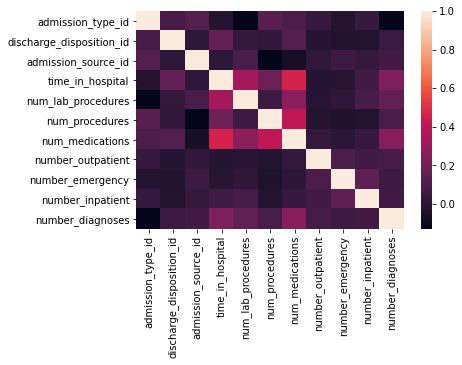

In [513]:
sns.heatmap(corr)

In [68]:
# One more look at the structure of the cleaned data - warning results in large file size
#df1.profile_report()

In [514]:
# Create a function to group diagnostic codes by range as well as separating diabetes specifically

def diag_grouper(series):
    
    '''takes input as df.col and outputs diagnostic code groupings'''
    
    def no_str(x):
        
        '''takes input as an element of a series and pulls code for diabetes specific disease and E/V categories'''
        
        if '250' in x: return '9999'
        elif 'E' in x: return '123456'
        elif 'V' in x: return '123456'
        elif x == 'missing': return '-654321'
        else: return x
    
    series = series.apply(no_str)
    
    series = series.astype(float)
    
    def num_categ(x):
        
        '''takes input as an element of a series and saves each range as a numerical placeholder'''
        
        if 1 <= x <= 139: return 10000
        elif 140 <= x <= 239: return 10001
        elif 240 <= x <= 279: return 10002
        elif 280 <= x <= 289: return 10003
        elif 290 <= x <= 319: return 10004
        elif 320 <= x <= 389: return 10005
        elif 390 <= x <= 459: return 10006
        elif 460 <= x <= 519: return 10007
        elif 520 <= x <= 579: return 10008
        elif 580 <= x <= 629: return 10009
        elif 630 <= x <= 679: return 10010
        elif 680 <= x <= 709: return 10011
        elif 710 <= x <= 739: return 10012
        elif 740 <= x <= 759: return 10013
        elif 760 <= x <= 779: return 10014
        elif 780 <= x <= 799: return 10015
        elif 800 <= x <= 999: return 10016
        else: return x
        
    series = series.apply(num_categ)
    
    def text_convert(x):
        
        '''takes input as an element of a series and converts each placeholder to string format'''
        
        if x == 10000: return "Infectious and Parasitic Disease"
        elif x == 10001: return "Neoplasms"
        elif x == 10002: return "Endocrine/Metabolic/Immunity Disorder"
        elif x == 10003: return "Blood/Blood Forming Organ Disease"
        elif x == 10004: return "Mental Disorder"
        elif x == 10005: return "Nervous System/Sense Organ Disease"
        elif x == 10006: return "Circulatory Disease"
        elif x == 10007: return "Respiratory Disease"
        elif x == 10008: return "Digestive Disease"
        elif x == 10009: return "Genitourinary Disease"
        elif x == 10010: return "Complications of Pregnancy/Childbirth/Puerperium"
        elif x == 10011: return "Skin Disease"
        elif x == 10012: return "Musculoskeletal/Connective Tissue Disease"
        elif x == 10013: return "Congenital Anomalies"
        elif x == 10014: return "Conditions of Perinatal Origin"
        elif x == 10015: return "Symptoms/Signs/Ill-Defined Conditions"
        elif x == 10016: return "Injury and Poisoning"
        elif x == 9999: return "Diabetes"
        elif x == 123456: return "External Injury/Supplemental"
        elif x == -654321: return "Missing"
    
    return series.apply(text_convert)

In [515]:
# Apply diag_grouper to the data frame
df1.diag_1 = diag_grouper(df1.diag_1)
df1.diag_2 = diag_grouper(df1.diag_2)
df1.diag_3 = diag_grouper(df1.diag_3)

In [516]:
df1.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,Diabetes,Missing,Missing,1,N
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,Endocrine/Metabolic/Immunity Disorder,Diabetes,Endocrine/Metabolic/Immunity Disorder,9,N
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,Complications of Pregnancy/Childbirth/Puerperium,Diabetes,External Injury/Supplemental,6,N
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Disease,Diabetes,Circulatory Disease,7,N
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,N
